In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df=pd.read_csv('/content/drive/MyDrive/gld_price_data.csv')

In [88]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [90]:
df.shape

(2290, 6)

In [91]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [92]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [93]:
df['Date'] = pd.to_datetime(df['Date'])

In [94]:
corr=df.corr()

In [95]:
corr['GLD'].sort_values(ascending=False)

GLD        1.000000
SLV        0.866632
Date       0.209118
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64

<Axes: >

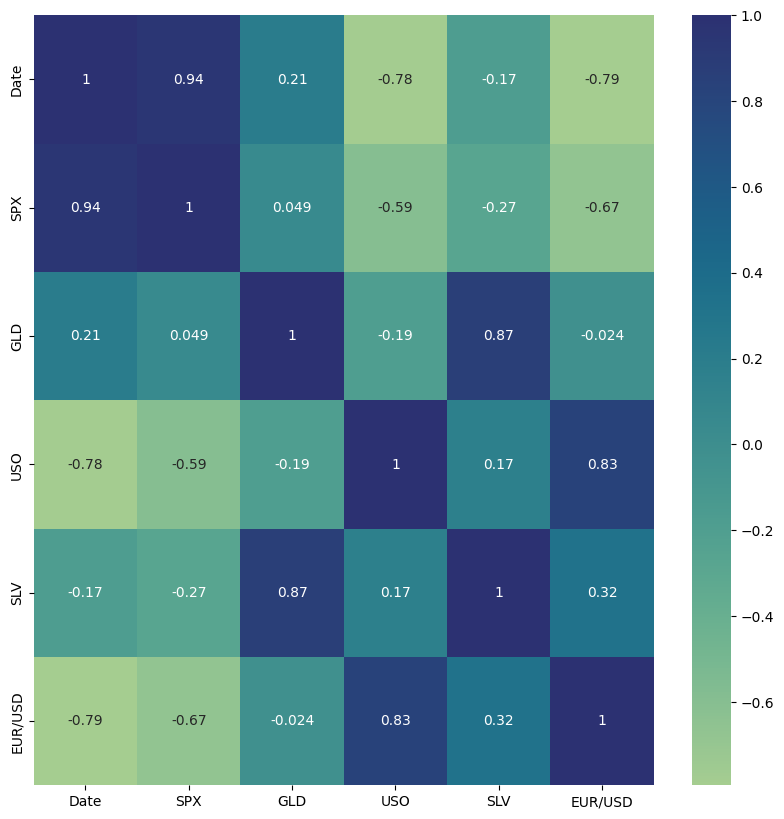

In [96]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='crest')

<Axes: ylabel='SLV'>

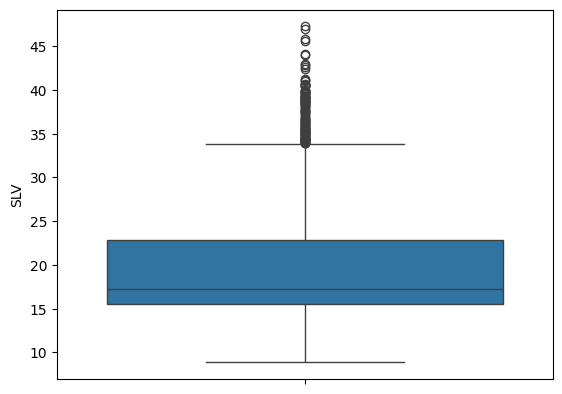

In [97]:
sns.boxplot(df['SLV'])

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X=df.drop(columns=['GLD','Date'],axis=1)

In [108]:
y=df['GLD']

In [109]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [111]:
reg=RandomForestRegressor()

In [112]:
reg.fit(X_train,y_train)

RandomForestRegressor()

In [113]:
y_pred=reg.predict(X_test)

In [114]:
r2=metrics.r2_score(y_test,y_pred)

In [115]:
print('r2 score is :', r2)

r2 score is : 0.9895666179441056


In [52]:
gold=df.copy()

In [54]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


In [55]:
cols=df.columns

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
sc=StandardScaler()

In [63]:
sc.fit_transform(X_train)
sc.transform(X_test)

array([[ 1.81274066, -1.01906036, -0.56888328, -0.74742927],
       [ 0.17335434,  0.15922401,  0.24361432,  0.73762254],
       [ 0.1590688 ,  0.20747256,  0.17906343,  0.64014221],
       ...,
       [-1.49184642,  0.07745509, -0.8130535 ,  0.88924252],
       [-1.3874894 ,  0.29635176, -0.63203075,  0.86555023],
       [-0.33603429,  0.06882101,  1.113646  ,  0.27456054]])

In [103]:
p99=X['SLV'].quantile(0.95)

In [104]:
p1=X['SLV'].quantile(0.05)

In [105]:
p99,p1

(33.90299954999998, 12.679)

In [106]:
X['SLV']=np.where(
    X['SLV']>p99,
    p99,
    np.where(
        X['SLV']<p1,
        p1,
        X['SLV']
    )
)

<Axes: ylabel='SLV'>

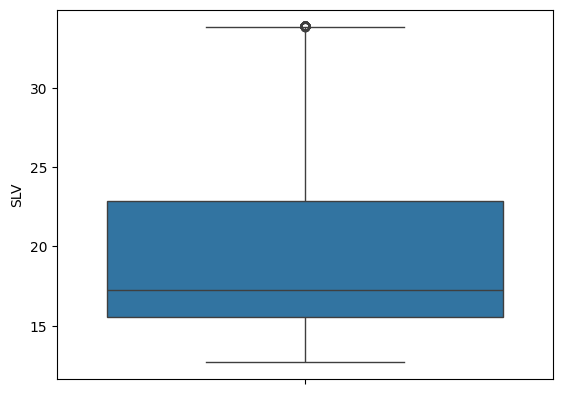

In [107]:
sns.boxplot(X['SLV'])